In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn import linear_model
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Leitura dos dados

In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DataSets/zombies-survey.csv")
df.head()

,name,type,gender,height,weight,gbc,gs,pbc,sp
0,Lossack Slossir,biological,male,73.85,241.89,0.8,14,5.1,3.5
1,Hasp Talch,biological,male,68.78,162.31,0.8,14,4.9,3.0
2,Lesprash Rindrad,biological,male,74.11,212.74,0.8,13,4.7,3.2
3,Halceff Gock,biological,male,71.73,220.04,0.8,15,4.6,3.1
4,Moddeche Splud,biological,male,69.88,206.35,0.8,14,5.0,3.6


# Correlação

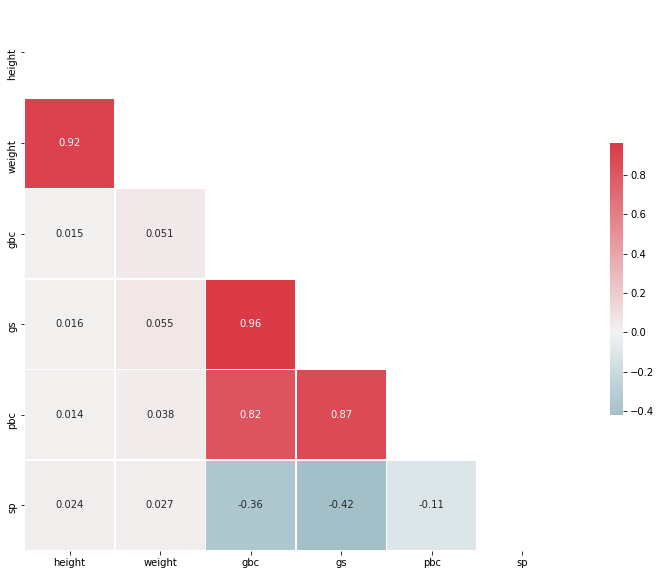

In [ ]:
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

## pearson

In [9]:
r=df.corr(method='pearson')
r

,height,weight,gbc,gs,pbc,sp
height,1.000000,0.922716,0.015146,0.016254,0.013778,0.023506
weight,0.922716,1.000000,0.050642,0.055106,0.037528,0.027125
gbc,0.015146,0.050642,1.000000,0.962757,0.817954,-0.356544
gs,0.016254,0.055106,0.962757,1.000000,0.871754,-0.420516
pbc,0.013778,0.037528,0.817954,0.871754,1.000000,-0.109369
sp,0.023506,0.027125,-0.356544,-0.420516,-0.109369,1.000000


## spearman

In [11]:
r=df.corr(method='spearman')
r

,height,weight,gbc,gs,pbc,sp
height,1.000000,0.925390,0.037217,0.019173,0.023096,0.006663
weight,0.925390,1.000000,0.068133,0.056392,0.042101,0.017222
gbc,0.037217,0.068133,1.000000,0.936003,0.834421,-0.277511
gs,0.019173,0.056392,0.936003,1.000000,0.881386,-0.303421
pbc,0.023096,0.042101,0.834421,0.881386,1.000000,-0.159457
sp,0.006663,0.017222,-0.277511,-0.303421,-0.159457,1.000000


# Análise

De acordo com a tabela de correlação:
  *   as variaves weight e height possuem alta correlação positiva com p = 3.79. Como os dados podem ser representados em um gráfico, possuindo uma forma oval, a correlação de pearson é um bom método para ser aplicado na avaliação dos dados. Além dissoi, as variááveis possuem uma ditribuição semelhante a distribuição gaussiana. 
  *   as variaves sp e pgs possuem baixa correlação com valor igual a -0.11 e p = 0.18.
  *   as variaves sp e gs correlação moderada com valor negativo igual a -0.42 com p = 8.43. Essas duas variáveis nãão seguem uma distribuiçãão normal, por isso, a métrica de Spear pode ser melhor aplicada nesse caso.

In [ ]:
import numpy as np
from scipy import stats

print("weight vs height")
print("\tPearson Original: ", stats.pearsonr(df['weight'],df['height']))
print("\tSpearman Original:", stats.spearmanr(df['weight'],df['height']))
print("\tPearson na Tabela de Ranks:", stats.pearsonr(df['weight'],df['height']))

print("\ngs vs gbc")
print("\tPearson Original: ", stats.pearsonr(df['gs'],df['gbc']))
print("\tSpearman Original:", stats.spearmanr(df['gs'],df['gbc']))
print("\tPearson na Tabela de Ranks:", stats.pearsonr(df['gs'],df['gbc']))

print("\nsp vs pbc")
print("\tPearson Original: ", stats.pearsonr(df['sp'],df['pbc']))
print("\tSpearman Original:", stats.spearmanr(df['sp'],df['pbc']))
print("\tPearson na Tabela de Ranks:", stats.pearsonr(df['sp'],df['pbc']))

print("\nsp vs gs")
print("\tPearson Original: ", stats.pearsonr(df['sp'],df['gs']))
print("\tSpearman Original:", stats.spearmanr(df['sp'],df['gs']))
print("\tPearson na Tabela de Ranks:", stats.pearsonr(df['sp'],df['gs']))

weight vs height
	Pearson Original:  (0.9227159756848627, 3.791958475028356e-63)
	Spearman Original: SpearmanrResult(correlation=0.9253899312200815, pvalue=3.0949995390308964e-64)
	Pearson na Tabela de Ranks: (0.9227159756848627, 3.791958475028356e-63)

gs vs gbc
	Pearson Original:  (0.9627570970509661, 5.776660988496418e-86)
	Spearman Original: SpearmanrResult(correlation=0.9360033509355781, pvalue=5.383649646073561e-69)
	Pearson na Tabela de Ranks: (0.9627570970509661, 5.776660988496418e-86)

sp vs pbc
	Pearson Original:  (-0.10936924995064937, 0.1827652152713699)
	Spearman Original: SpearmanrResult(correlation=-0.15945651848582867, pvalue=0.05128491483834292)
	Pearson na Tabela de Ranks: (-0.10936924995064937, 0.1827652152713699)

sp vs gs
	Pearson Original:  (-0.4205160964011545, 8.429366392950231e-08)
	Spearman Original: SpearmanrResult(correlation=-0.3034206463815157, pvalue=0.0001603809454660342)
	Pearson na Tabela de Ranks: (-0.4205160964011545, 8.429366392950231e-08)


In [ ]:
for i,row in df.iterrows():
  #print(row['weight'])
  pass

# Grandezas Estatíticas do Dataset

In [7]:
print(df.describe())

           height      weight         gbc          gs         pbc          sp
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000
mean    66.257867  159.676867    4.794667   37.586667    5.843333    3.054000
std      3.935920   33.072120    3.052643   17.644204    0.828066    0.433594
min     56.160000   84.870000    0.400000   10.000000    4.300000    2.000000
25%     63.402500  135.015000    1.200000   16.000000    5.100000    2.800000
50%     66.280000  158.120000    5.200000   43.500000    5.800000    3.000000
75%     69.157500  186.317500    7.200000   51.000000    6.400000    3.300000
max     75.210000  241.890000   10.000000   69.000000    7.900000    4.400000


# Scatter

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2efbbcb150>,
      dtype=object)

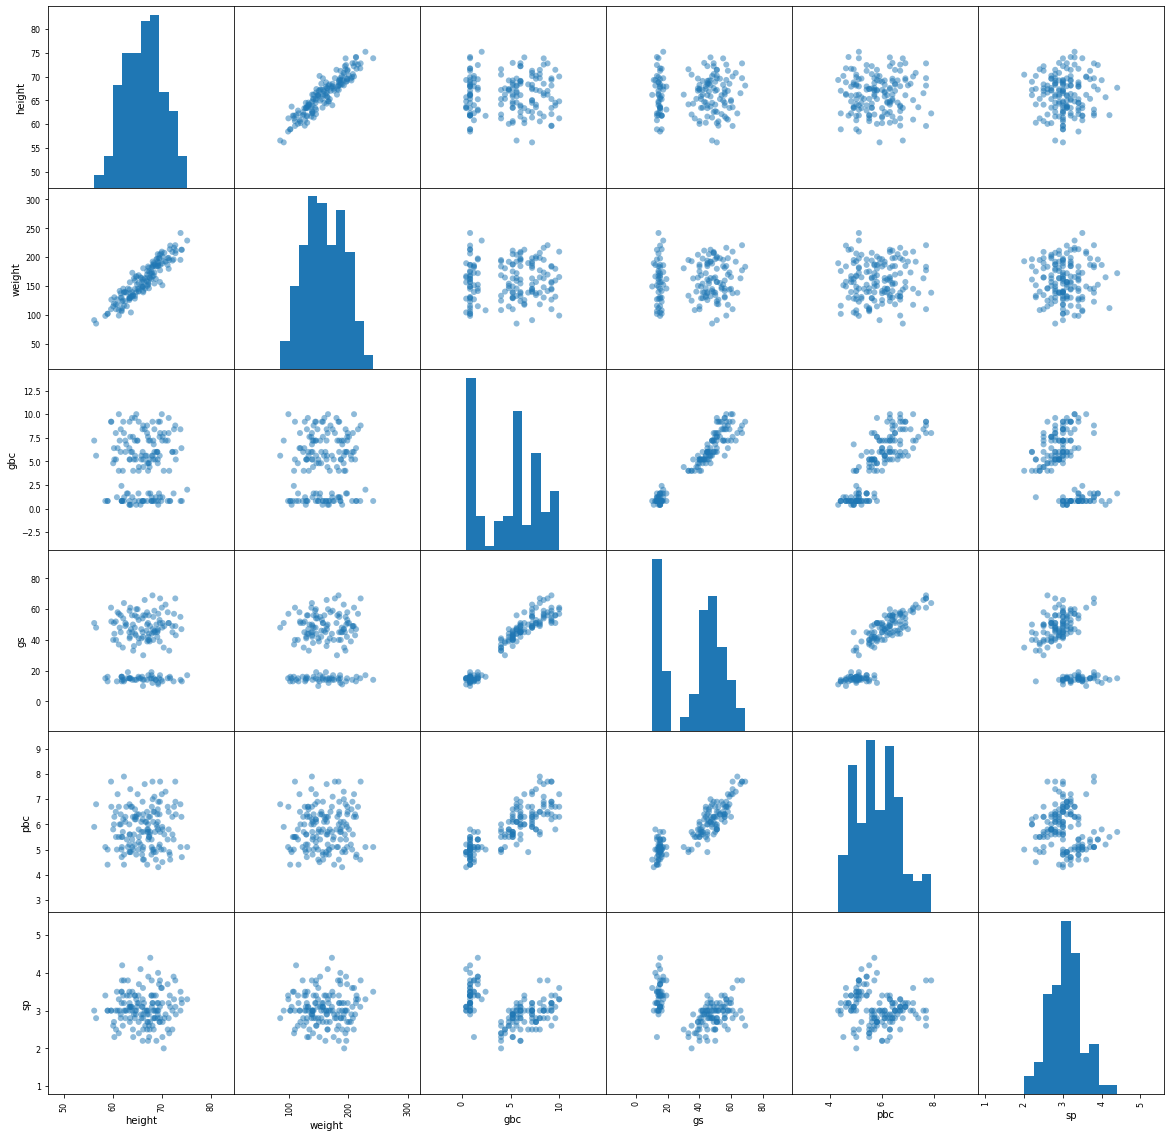

In [5]:
pd.plotting.scatter_matrix(df,figsize=(20,20), marker='o', grid=True, range_padding=1, alpha=0.5)

# weight e height

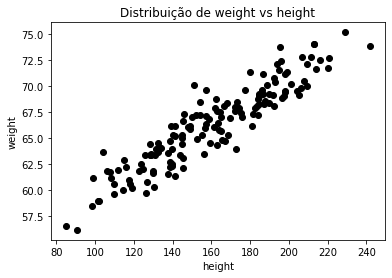

In [ ]:
plt.scatter(df['weight'],df['height'],  color='black')
plt.title("Distribuição de weight vs height")
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

Menor valor de weight:  84.87
Maior valor de weight:  241.89
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


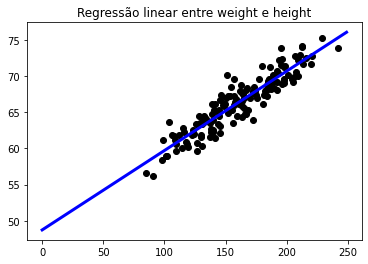

In [ ]:
print('Menor valor de weight: ', df['weight'].min())
print('Maior valor de weight: ', df['weight'].max())

# Create linear regression object
regr = linear_model.LinearRegression()

x=np.asarray(df['weight']).reshape(-1,1)
y=np.asarray(df['height']).reshape(-1,1)

regr.fit(x,y)
print(regr)
new_input=np.asarray(range(250)).reshape(-1,1)
predicted_output=regr.predict(new_input)

plt.scatter(df['weight'],df['height'],  color='black')
plt.title("Regressão linear entre weight e height")
plt.plot(new_input, predicted_output, color='blue', linewidth=3)
plt.show()

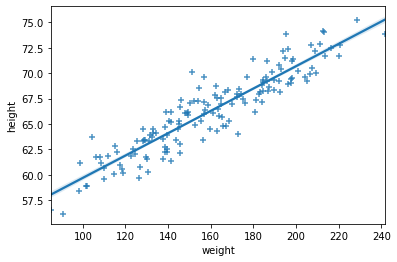

In [ ]:
import seaborn as sns
import pandas as pd

x = pd.Series(df['weight'], name="weight")
y=pd.Series(df['height'],name="height")
ax = sns.regplot(x=x, y=y, marker="+",ci=70)

# sp e gs

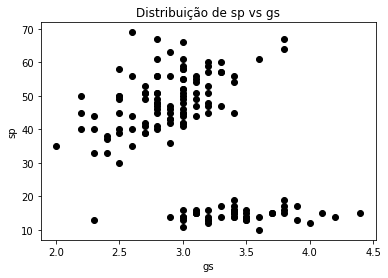

In [ ]:
plt.scatter(df['sp'],df['gs'],  color='black')
plt.title("Distribuição de sp vs gs")
plt.xlabel("gs")
plt.ylabel("sp")
plt.show()

Menor valor de sp:  2.0
Maior valor de sp:  4.4
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


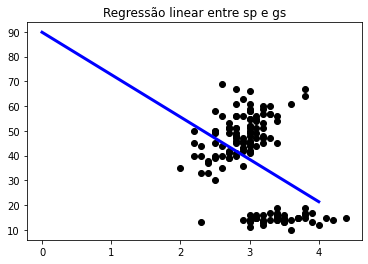

In [ ]:
print('Menor valor de sp: ', df['sp'].min())
print('Maior valor de sp: ', df['sp'].max())

# Create linear regression object
regr = linear_model.LinearRegression()

x=np.asarray(df['sp']).reshape(-1,1)
y=np.asarray(df['gs']).reshape(-1,1)

regr.fit(x,y)
print(regr)
new_input=np.asarray(range(5)).reshape(-1,1)
predicted_output=regr.predict(new_input)

plt.scatter(df['sp'],df['gs'],  color='black')
plt.title("Regressão linear entre sp e gs")
plt.plot(new_input, predicted_output, color='blue', linewidth=3)
plt.show()

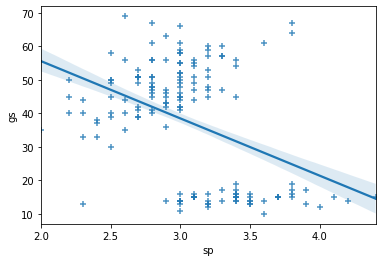

In [ ]:
import seaborn as sns
import pandas as pd

x = pd.Series(df['sp'], name="sp")
y=pd.Series(df['gs'],name="gs")
ax = sns.regplot(x=x, y=y, marker="+",ci=70)

# sp e pbc

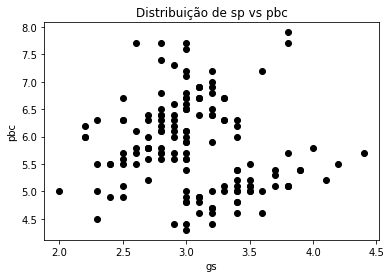

In [ ]:
plt.scatter(df['sp'],df['pbc'],  color='black')
plt.title("Distribuição de sp vs pbc")
plt.xlabel("gs")
plt.ylabel("pbc")
plt.show()

Menor valor de pbc:  4.3
Maior valor de pbc:  7.9
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


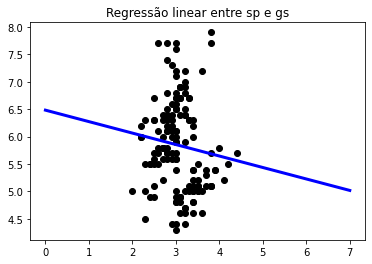

In [ ]:
print('Menor valor de pbc: ', df['pbc'].min())
print('Maior valor de pbc: ', df['pbc'].max())

# Create linear regression object
regr = linear_model.LinearRegression()

x=np.asarray(df['sp']).reshape(-1,1)
y=np.asarray(df['pbc']).reshape(-1,1)

regr.fit(x,y)
print(regr)
new_input=np.asarray(range(8)).reshape(-1,1)
predicted_output=regr.predict(new_input)

plt.scatter(df['sp'],df['pbc'],  color='black')
plt.title("Regressão linear entre sp e gs")
plt.plot(new_input, predicted_output, color='blue', linewidth=3)
plt.show()

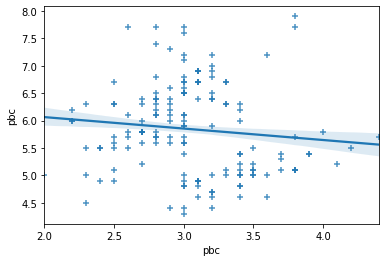

In [ ]:
import seaborn as sns
import pandas as pd

x = pd.Series(df['sp'], name="pbc")
y=pd.Series(df['pbc'], name="pbc")
ax = sns.regplot(x=x, y=y, marker="+",ci=70)

# Funções

In [12]:
def calculate_pvalues_p(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = pearsonr(df[r], df[c])[1]
    return pvalues

def calculate_pvalues_s(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = spearmanr(df[r], df[c])[1]
    return pvalues

In [18]:
p=calculate_pvalues_p(df)
p

,height,weight,gbc,gs,pbc,sp
height,0,3.79196e-63,0.854049,0.843501,0.867102,0.775242
weight,3.79196e-63,0,0.538265,0.503001,0.648436,0.741787
gbc,0.854049,0.538265,0,5.77666e-86,2.31485e-37,7.52389e-06
gs,0.843501,0.503001,5.77666e-86,0,1.03845e-47,8.42937e-08
pbc,0.867102,0.648436,2.31485e-37,1.03845e-47,0,0.182765
sp,0.775242,0.741787,7.52389e-06,8.42937e-08,0.182765,0


In [17]:
p=calculate_pvalues_s(df)
p

,height,weight,gbc,gs,pbc,sp
height,0,3.095e-64,0.651155,0.81586,0.779065,0.935505
weight,3.095e-64,0,0.407422,0.493076,0.608973,0.834314
gbc,0.651155,0.407422,0,5.38365e-69,3.97021e-40,0.000585693
gs,0.81586,0.493076,5.38365e-69,0,4.64951e-50,0.000160381
pbc,0.779065,0.608973,3.97021e-40,4.64951e-50,0,0.0512849
sp,0.935505,0.834314,0.000585693,0.000160381,0.0512849,0
